# CASE STUDY :  KNN model to classify the different types of Glass


K Nearest Neighbor algorithm
-----

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

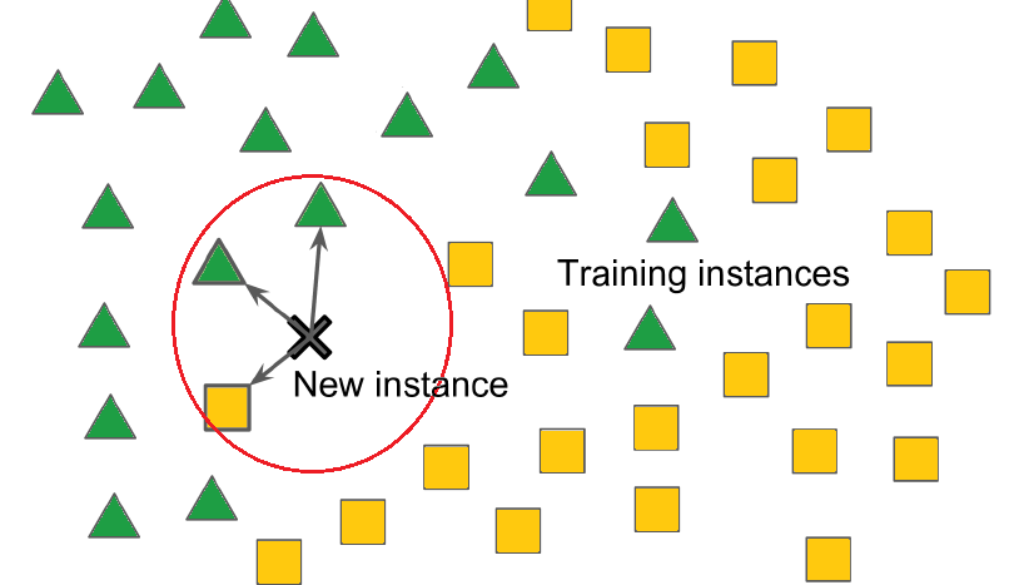

PROCEDURE
----
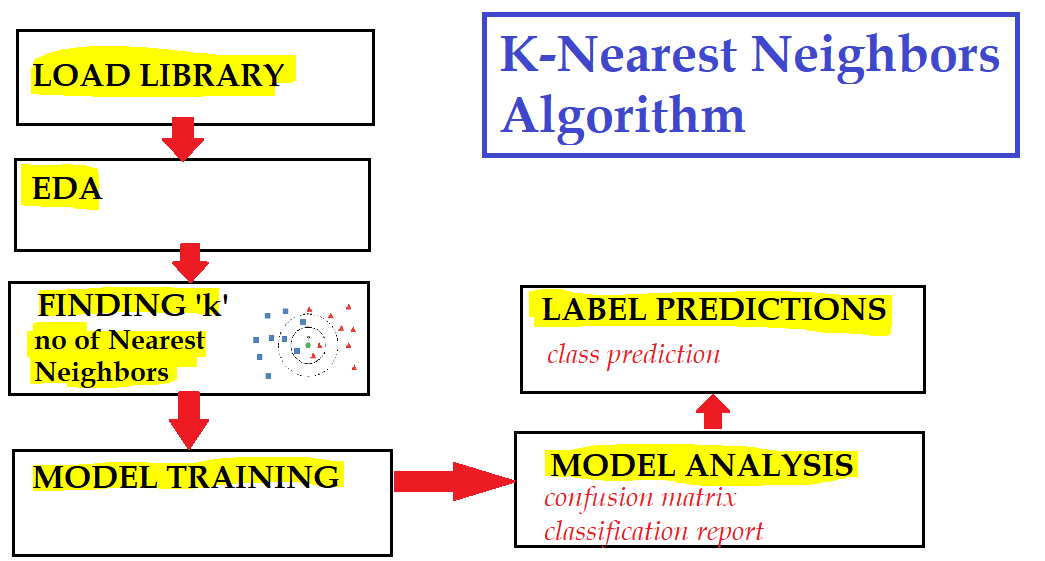

In [ ]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler

#SET 3 : ML SPECIFIC
from sklearn.neighbors import KNeighborsClassifier

#SET 4 : ML EVALUATION SPECIFIC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving glass.csv to glass.csv


In [ ]:
# Import Dataset
glass_df = pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


DATA DICTIONARY
---

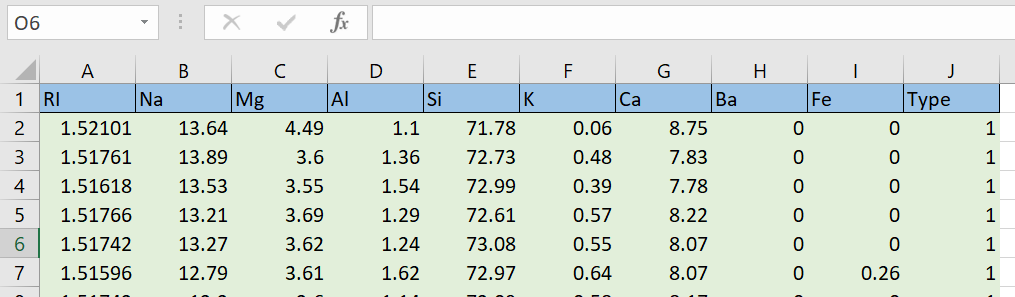

Data Description:


RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
- 1 -- building_windows_float_processed
- 2 --building_windows_non_float_processed
- 3 --vehicle_windows_float_processed
- 4 --vehicle_windows_non_float_processed (none in this database)
- 5 --containers
- 6 --tableware
- 7 --headlamps

# EDA

- data dictionary
- data cleaning
- variable analysis
- univariate analysis
- multivariate analysis
- correlation analysis
- statistical analysis
- required tranformations

DataSet analysis
----

- data size
- data type
- data shape

In [ ]:
#  shape of dataset with rows and columns
glass_df.shape

(213, 10)

conclusion

- no of observations = 213
- no of features = 10

In [ ]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 26.4 KB


In [ ]:
#unique
glass_df["Type"].unique()

array([1, 2, 3, 5, 6, 7])

DATA CLEANING
----

- missing/null values
- duplicates

Missing Values

In [ ]:
glass_df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [ ]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

conclusion : We have no missing data so all the entries are valid for use.

Duplicated Values

In [ ]:
glass_df[glass_df.duplicated()].shape

(1, 10)

In [ ]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass_df.drop_duplicates(inplace=True)

STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [ ]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


conclusion: The features are not on the same scale , so scaling is reqs

In [ ]:
glass_df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

The dataset is pretty unbalanced

UNIVARIATE ANALYSIS
---
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

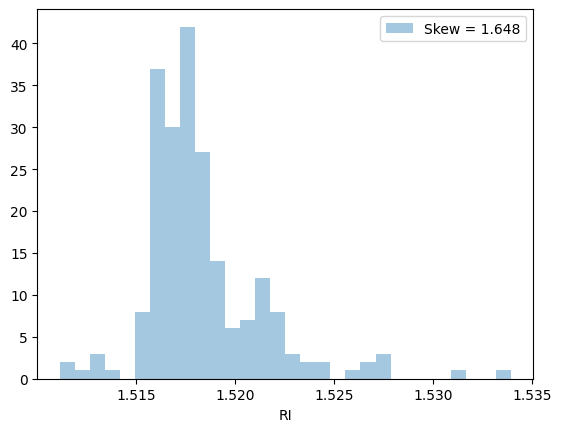

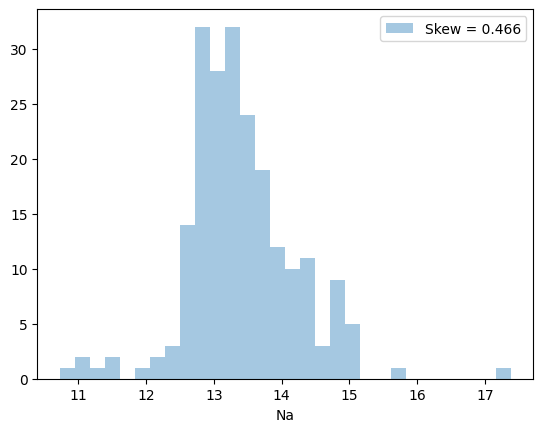

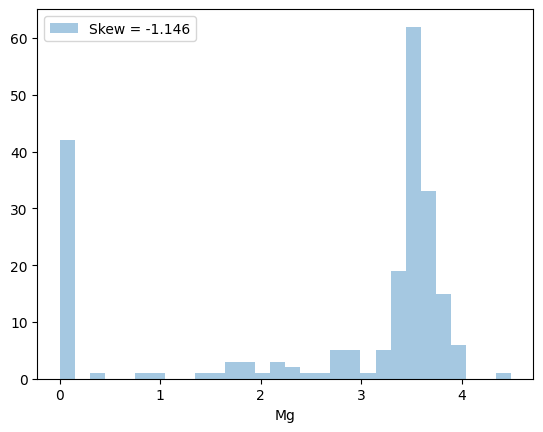

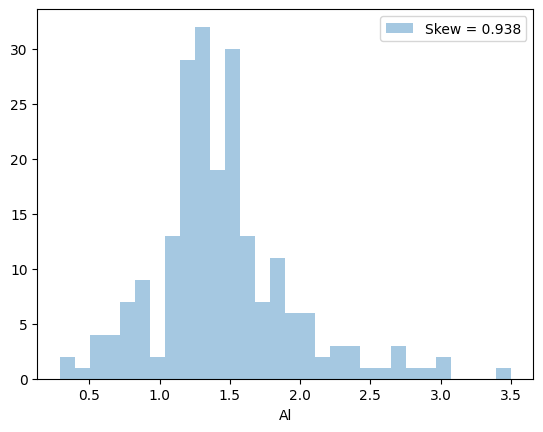

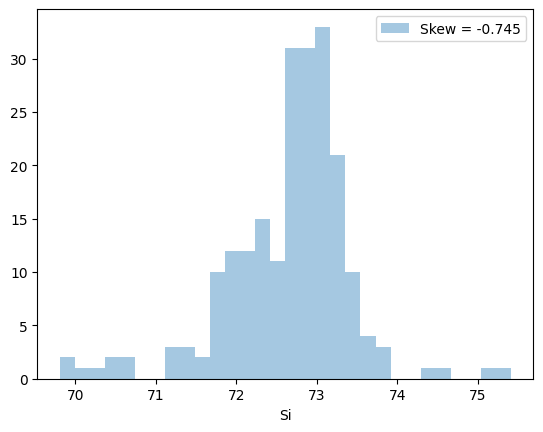

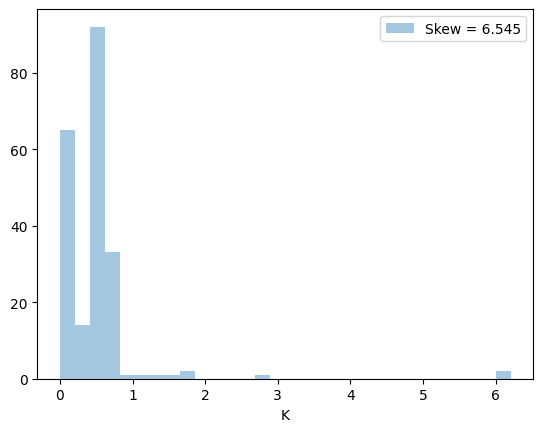

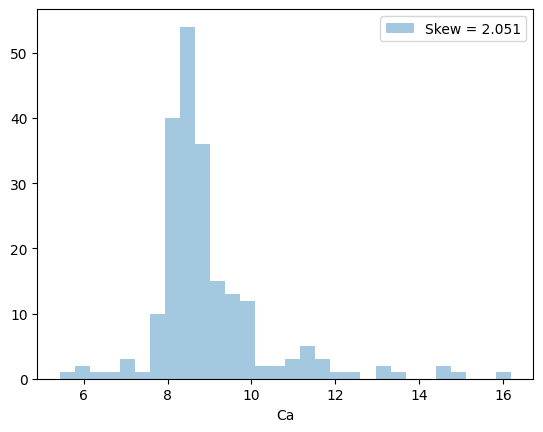

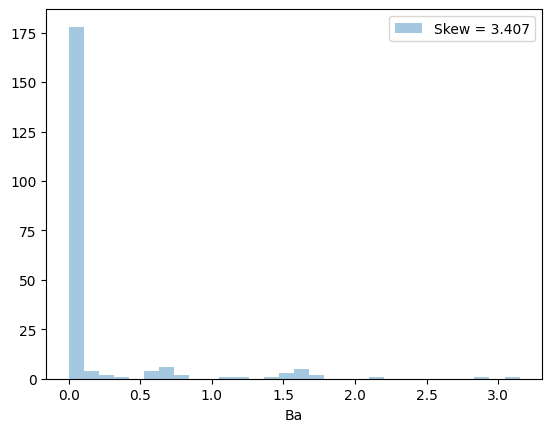

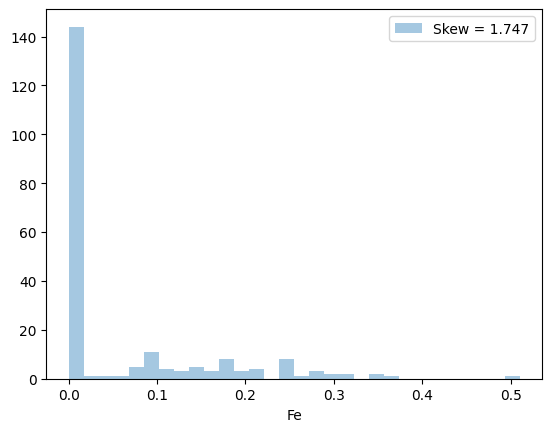

In [ ]:
features = glass_df.columns[:-1].tolist()
for feat in features:
    skew = glass_df[feat].skew()
    sns.distplot(glass_df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

OULIERS ANALYSIS
---

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [ ]:
list(glass_df)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

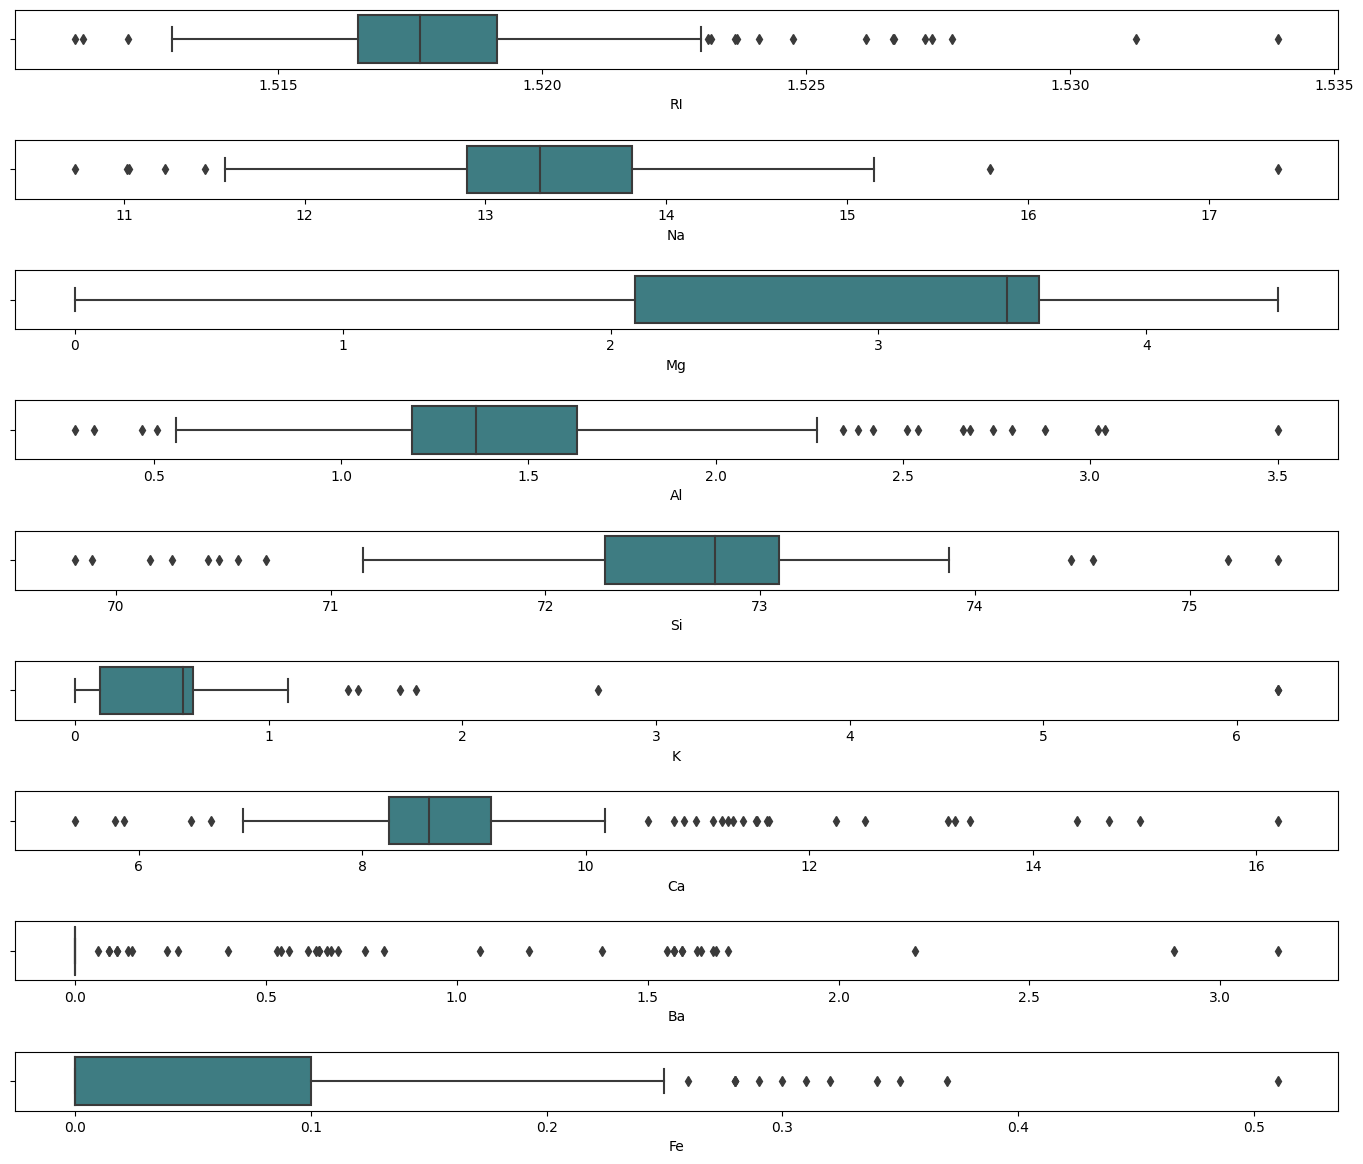

In [ ]:
ot=glass_df.copy()
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

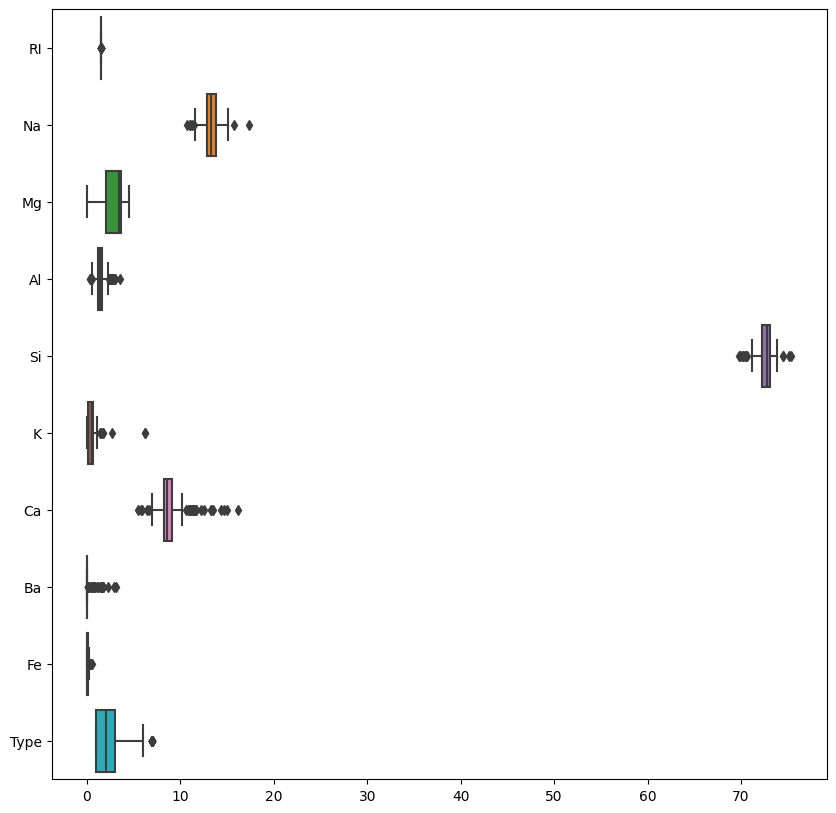

In [ ]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=glass_df, orient="h");

CORRELATION ANALYSIS
---

<Figure size 800x800 with 0 Axes>

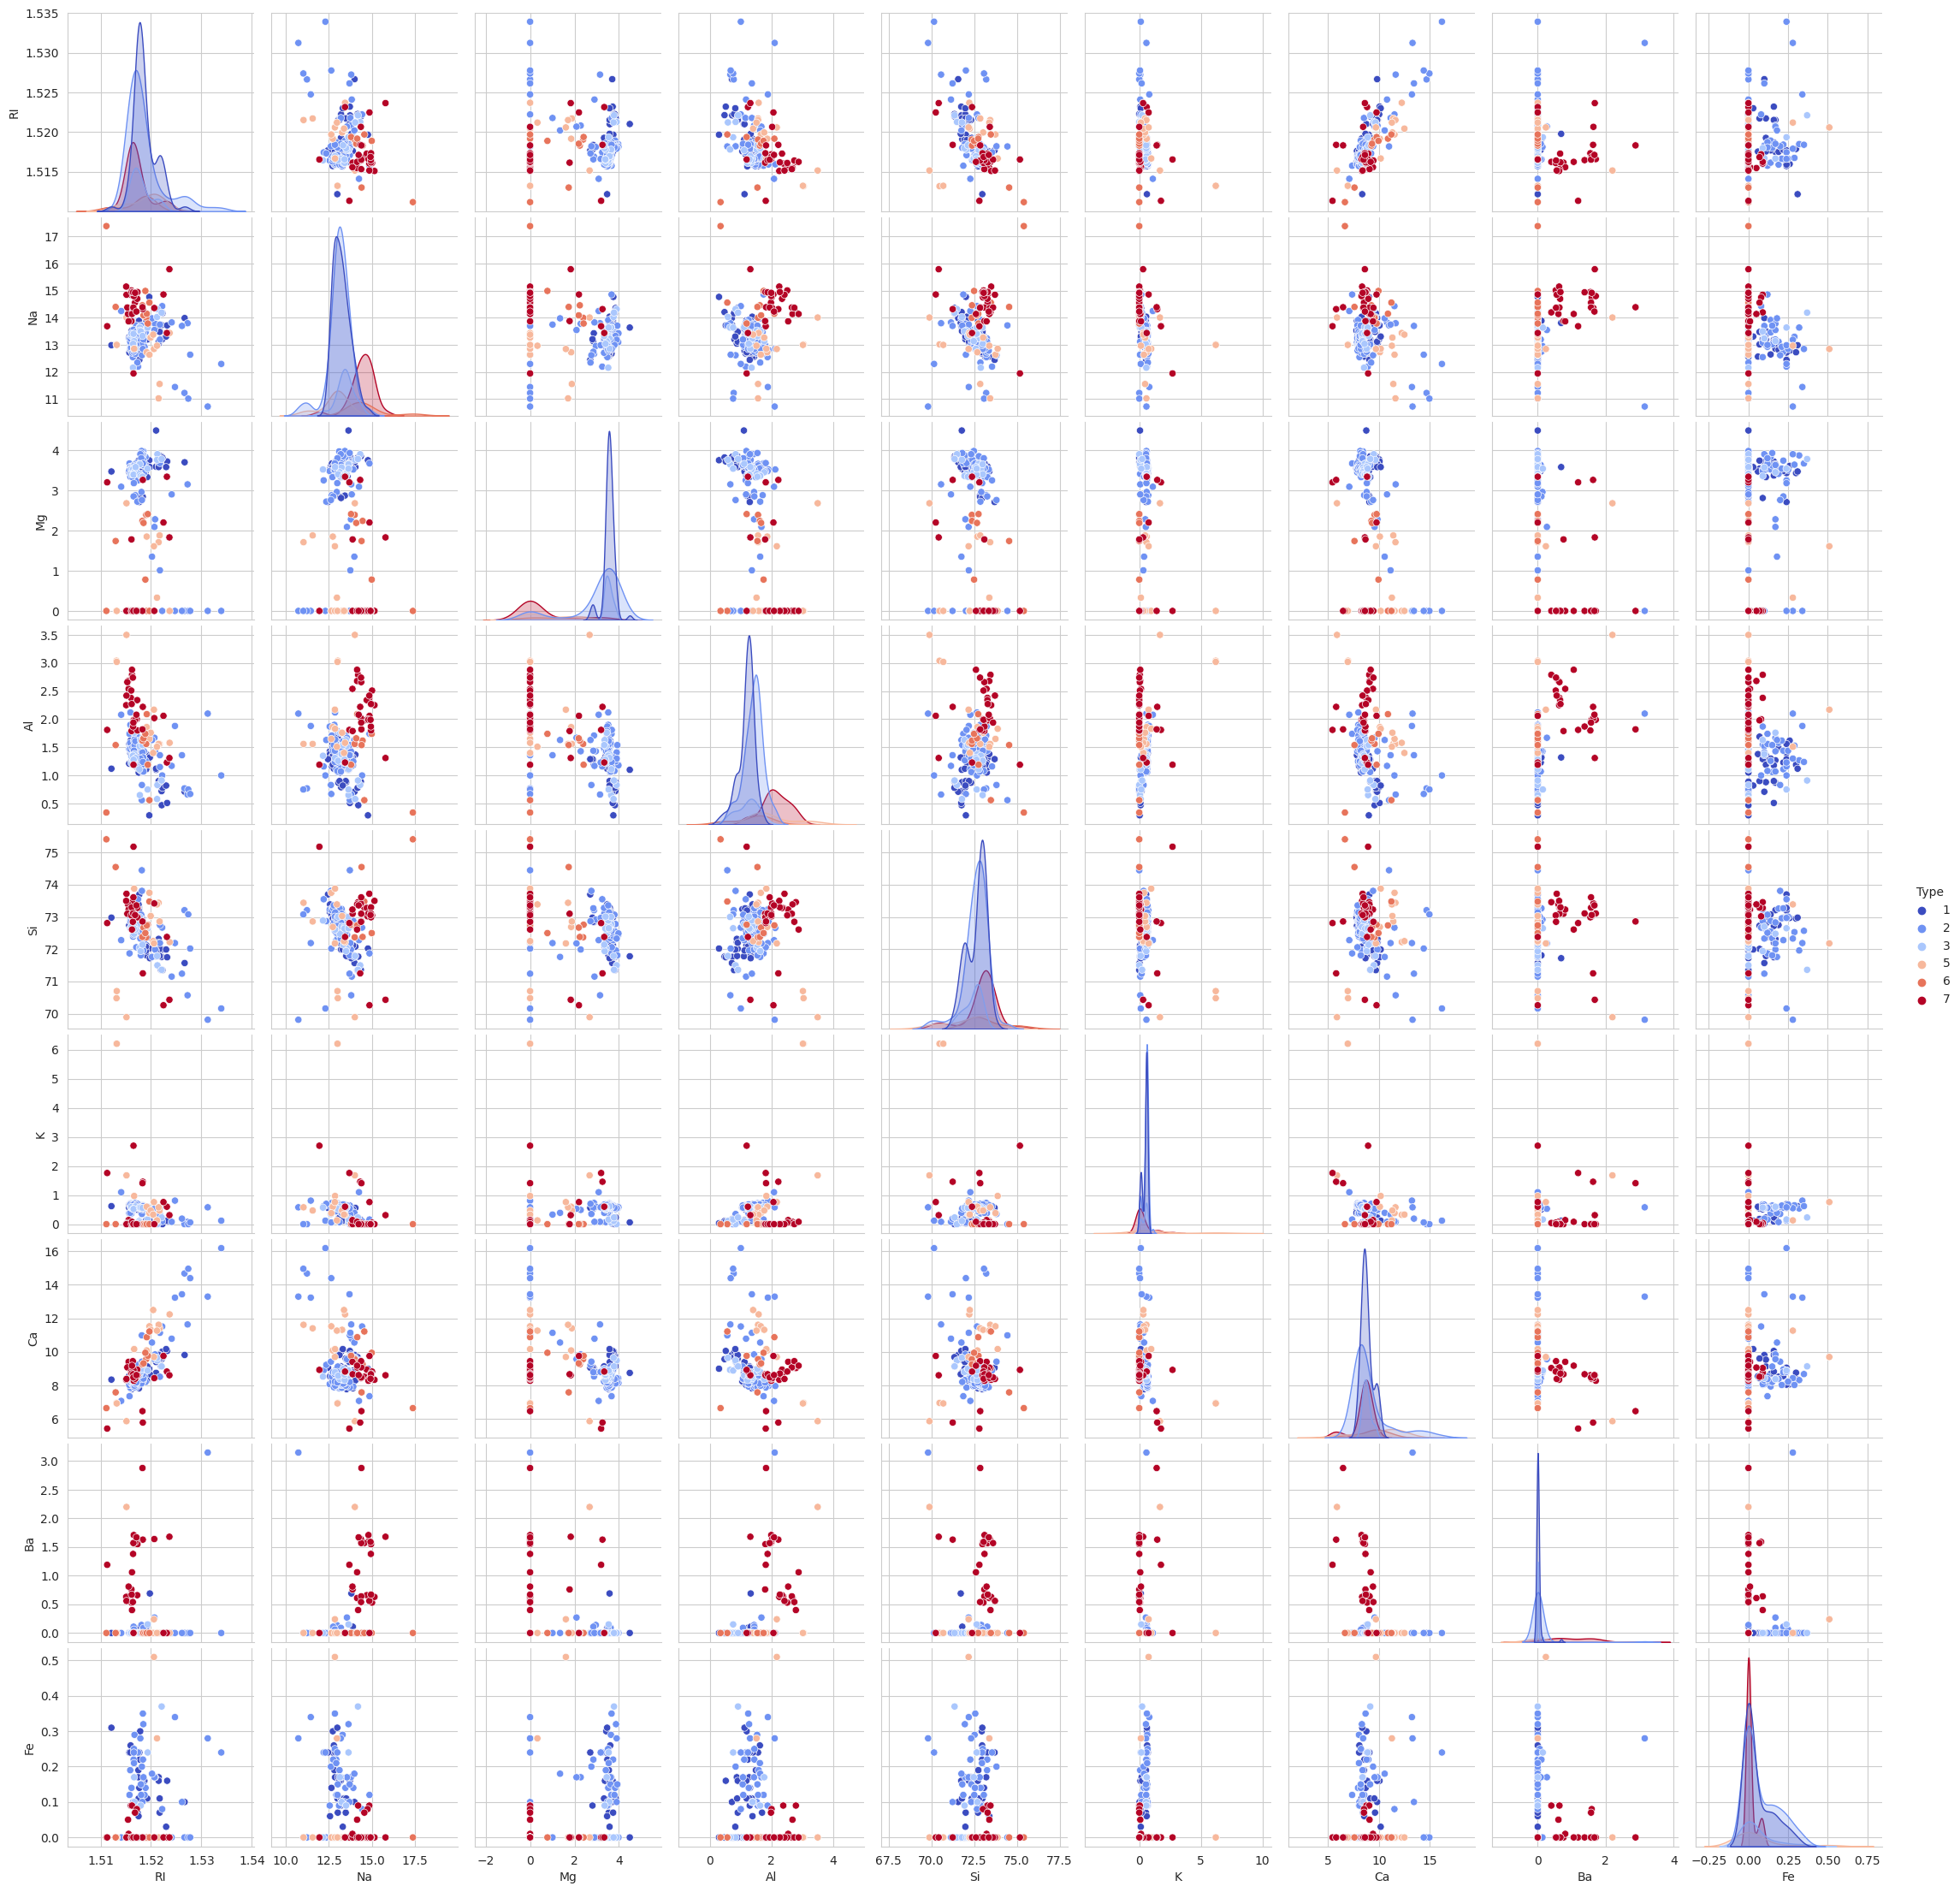

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(glass_df,hue ='Type', palette='coolwarm')
plt.show()

<Axes: >

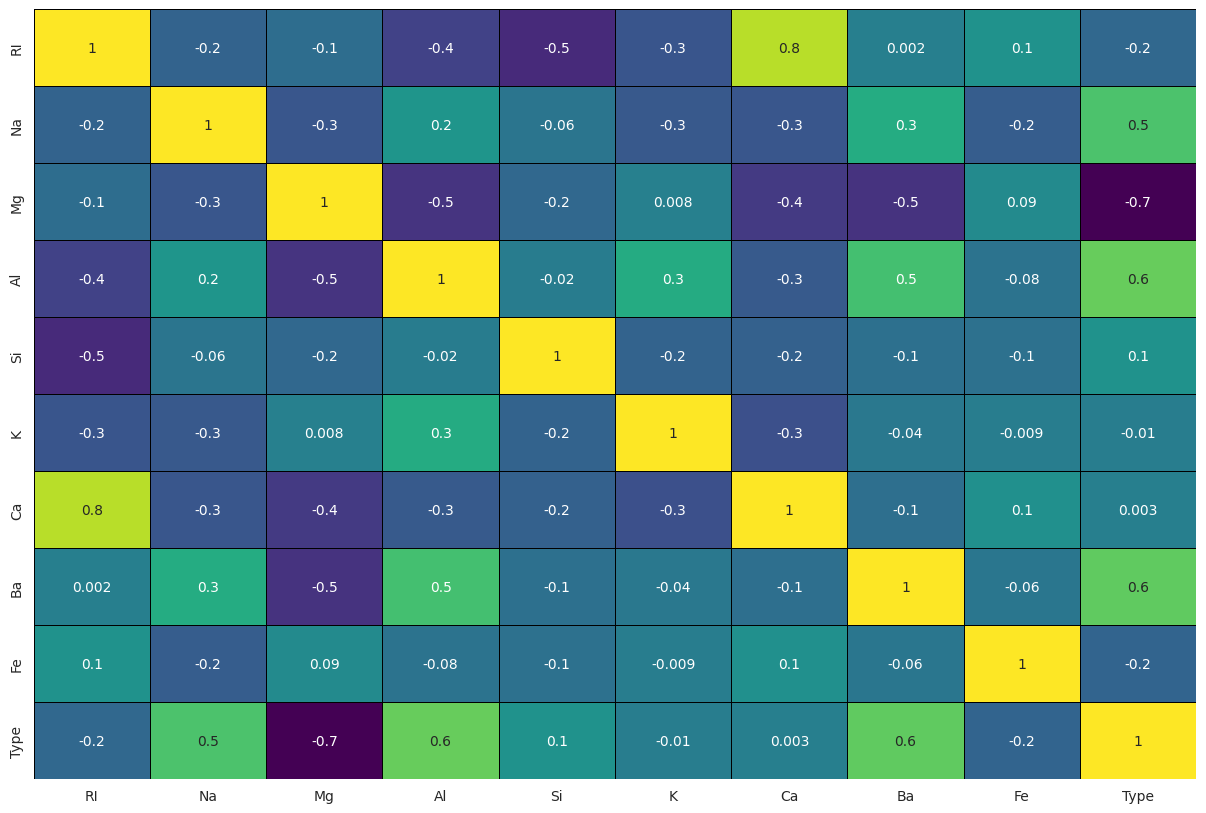

In [ ]:
# heatmap for correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

RESPONSE VARIABLE ANALYSIS
----

Text(0.5, 1.0, 'Histogram of Classes')

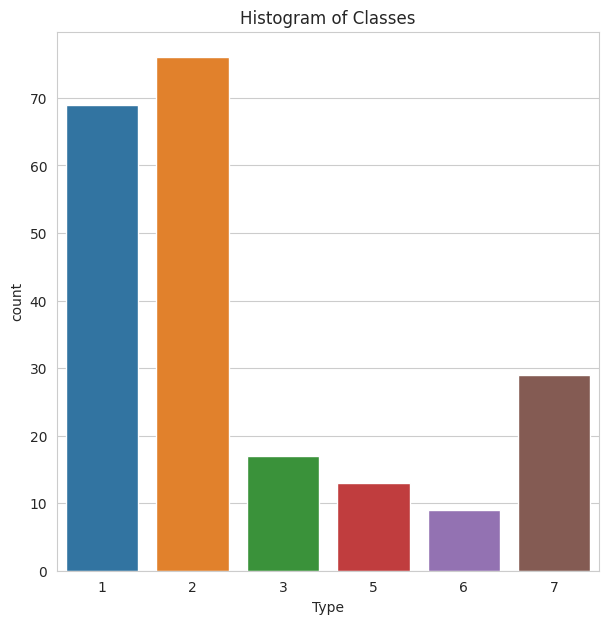

In [ ]:
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(data=glass_df,x='Type')
ax = plt.gca()
ax.set_title("Histogram of Classes")

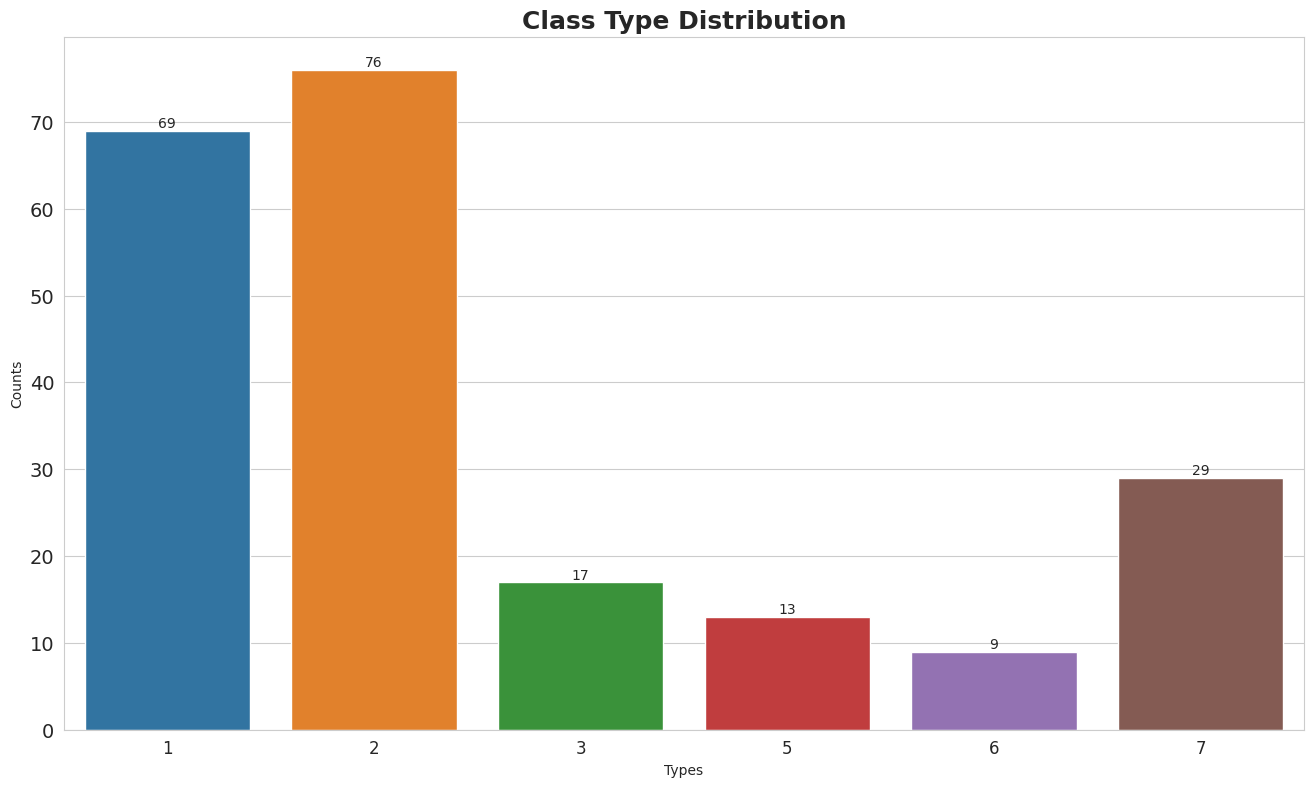

In [ ]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = glass_df['Type'].value_counts().index.tolist(), y = glass_df['Type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks( fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

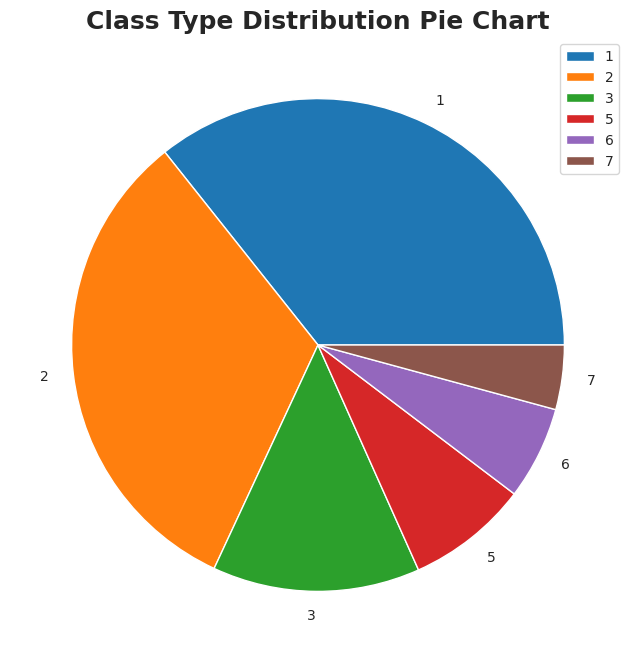

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(glass_df['Type'].value_counts(),labels=glass_df.Type.unique())
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Pre-Processing

- feature slections
- measures for outlier
- scaling
- tranformation

In [ ]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Measures for outliers
---

In [ ]:
outlier_indices = outlier_hunt(glass_df[features])
df = glass_df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Skewness analysis
----

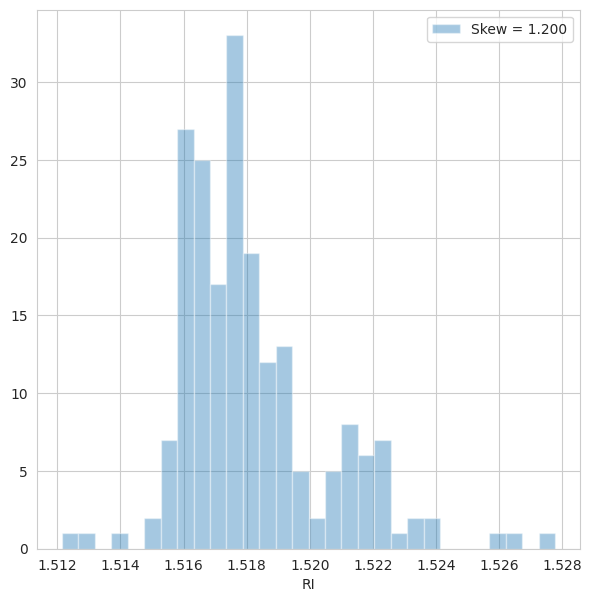

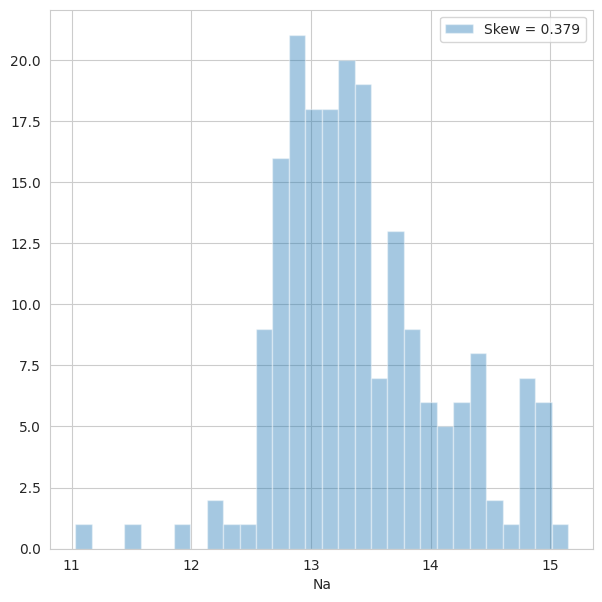

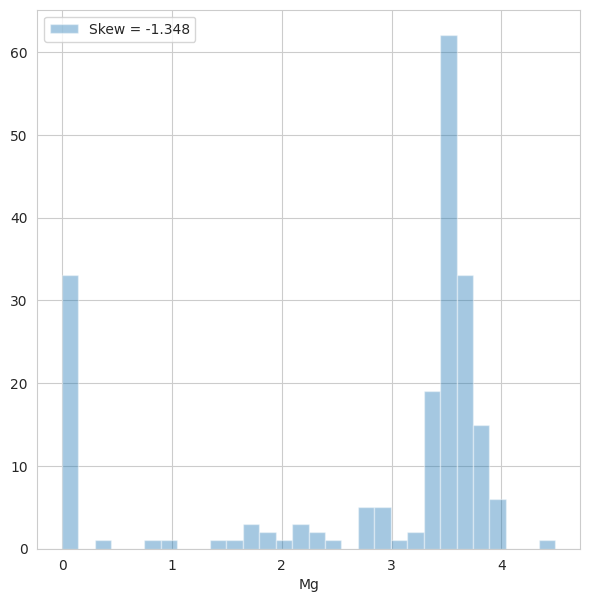

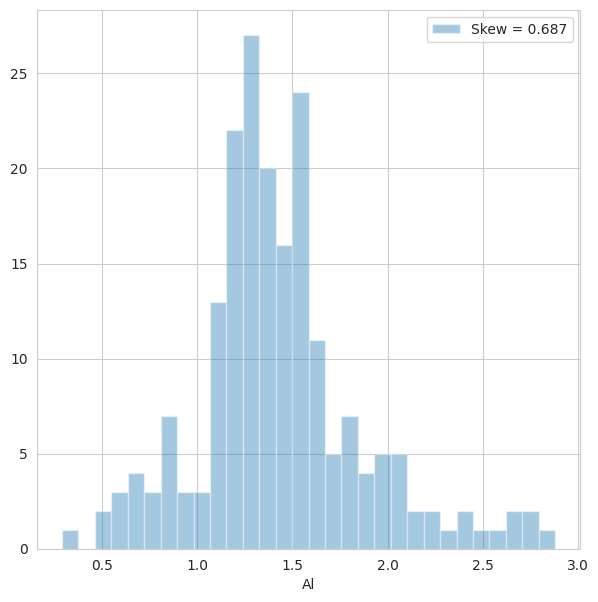

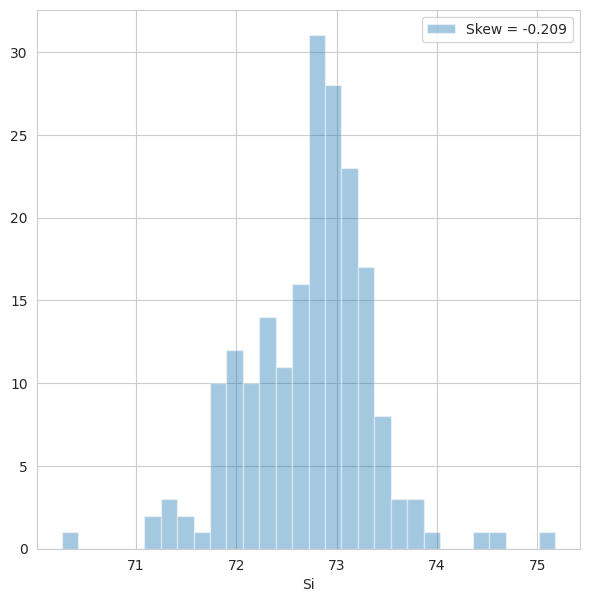

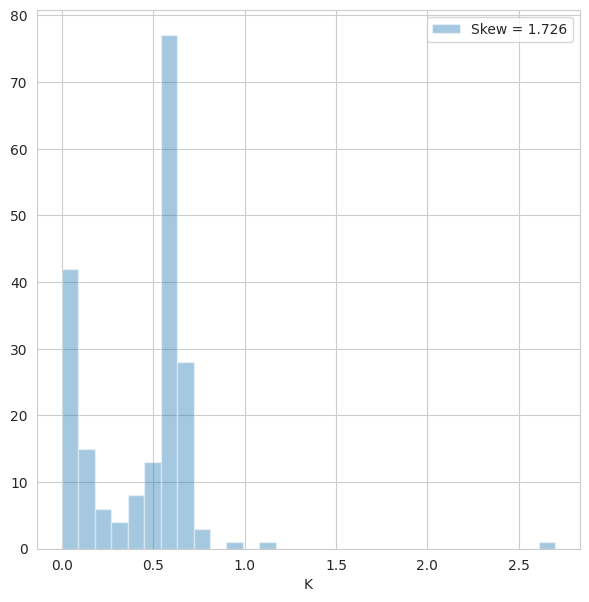

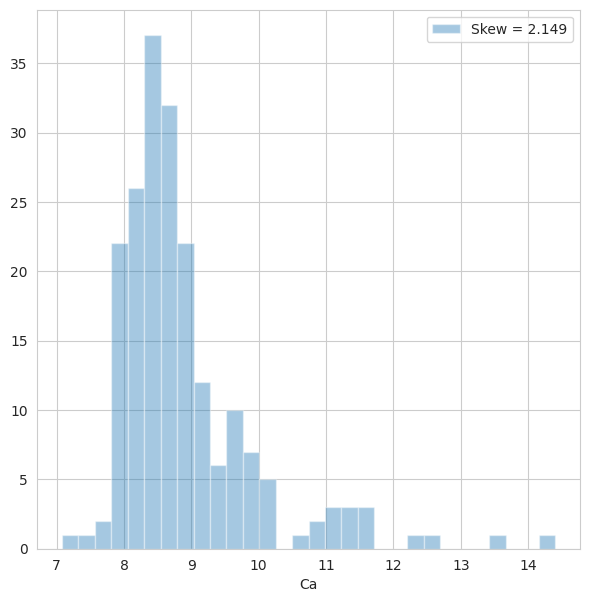

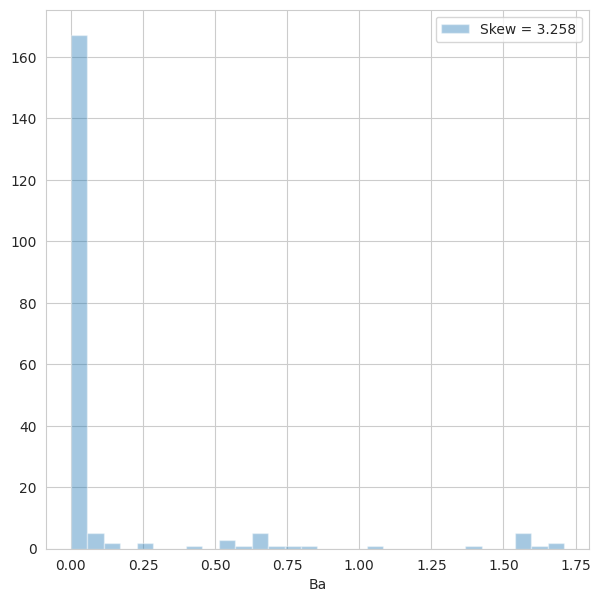

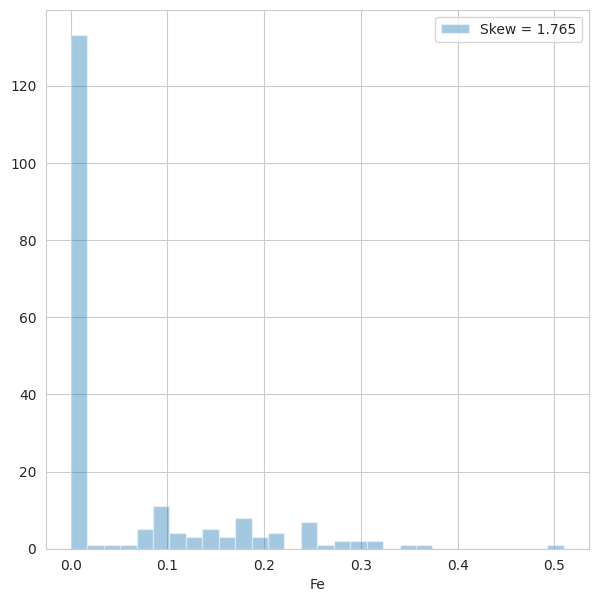

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Data transformation
----
- Approach 1 : power tranformation
- Approach 2 : box cox tranf.

In [ ]:
from scipy.stats import boxcox
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,1.990000e+02,199.000000,199.000000,199.000000
mean,6.135862e-04,0.874501,14.578975,0.929450,1.023351e+10,0.344920,1.985160e-01,0.013508,0.019346,2.678392
std,1.086937e-19,0.002675,7.901546,0.202842,4.937335e+08,0.214132,7.909544e-07,0.031406,0.027959,2.056545
min,6.135862e-04,0.863427,0.000000,0.259213,8.401675e+09,0.000000,1.985128e-01,0.000000,0.000000,1.000000
25%,6.135862e-04,0.872688,9.896070,0.828312,9.937528e+09,0.127466,1.985155e-01,0.000000,0.000000,1.000000
50%,6.135862e-04,0.874194,18.254744,0.912136,1.030630e+10,0.448448,1.985159e-01,0.000000,0.000000,2.000000
75%,6.135862e-04,0.876051,19.566760,1.028606,1.052556e+10,0.481740,1.985164e-01,0.000000,0.051872,3.000000
max,6.135862e-04,0.880655,30.922362,1.492357,1.234753e+10,1.402012,1.985179e-01,0.091630,0.069336,7.000000


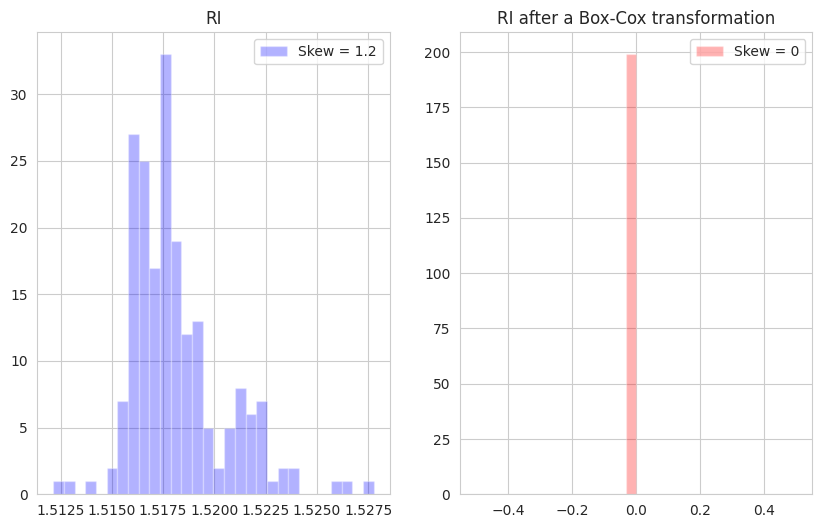

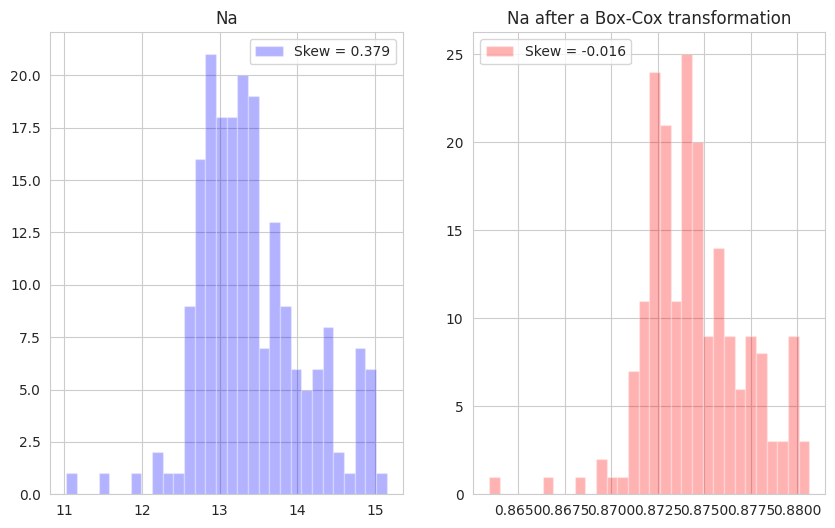

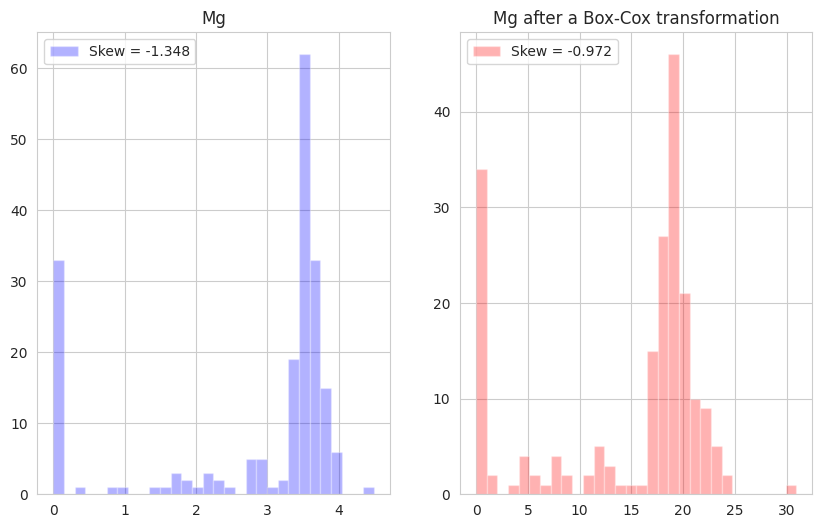

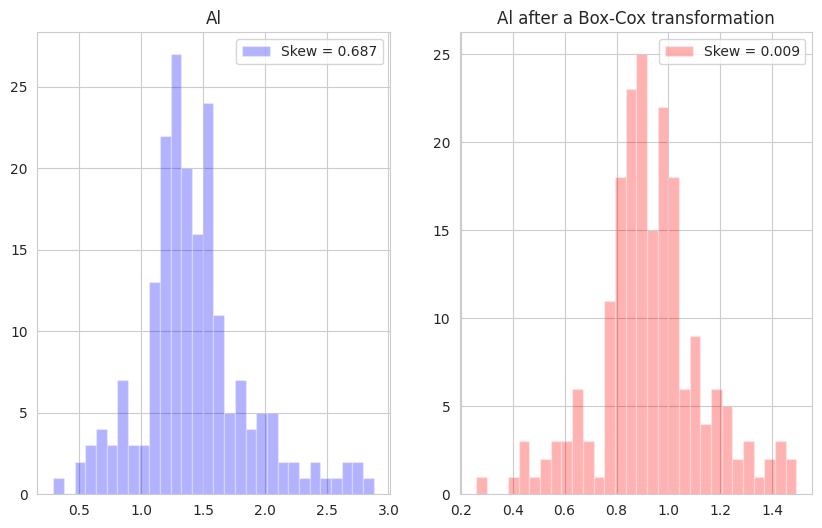

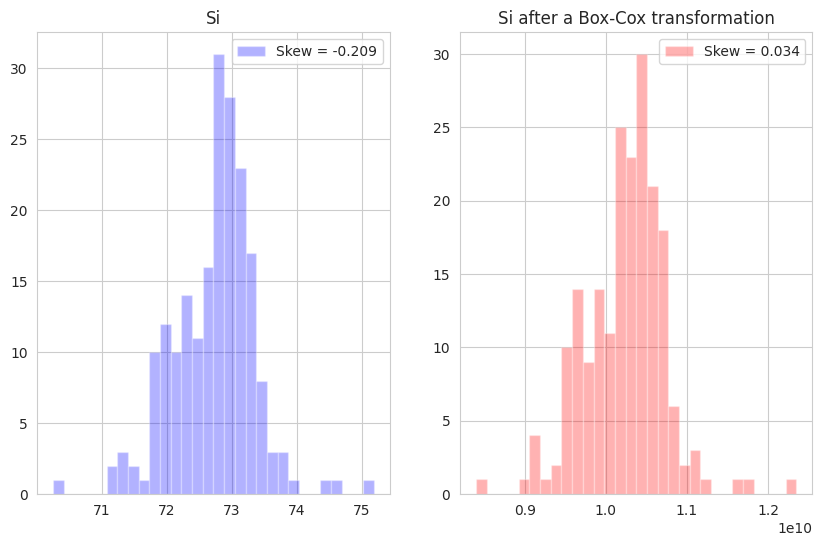

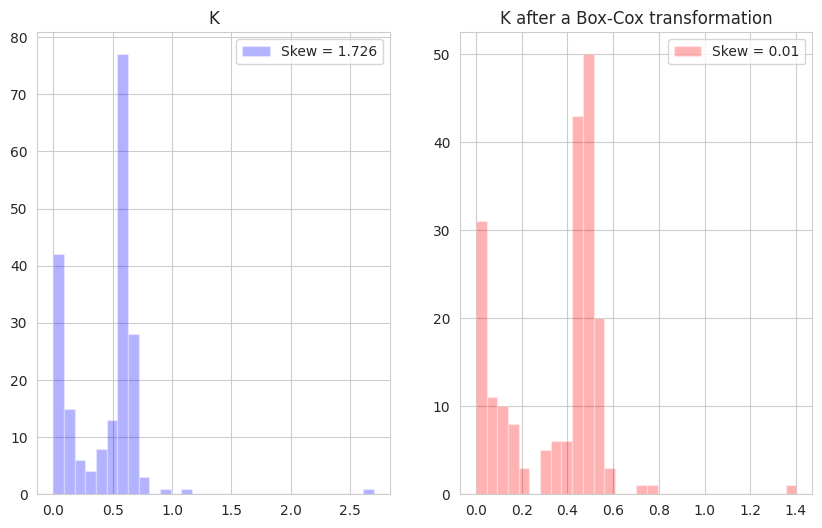

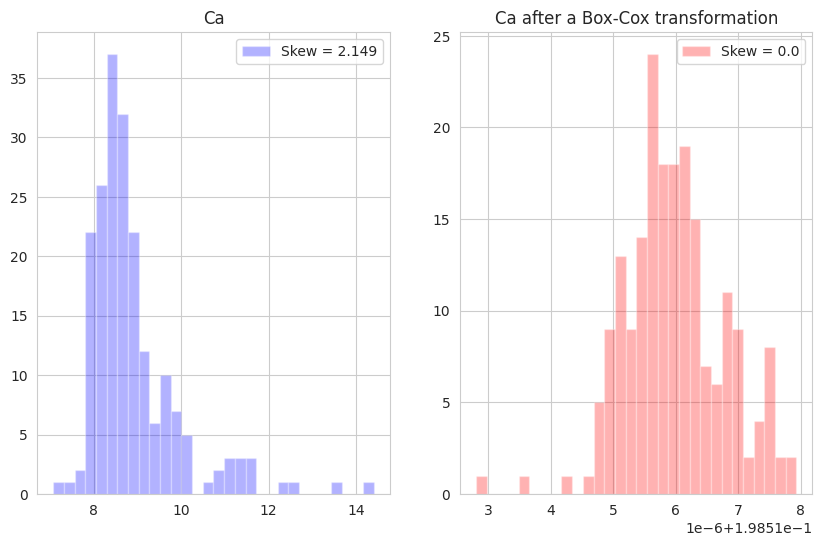

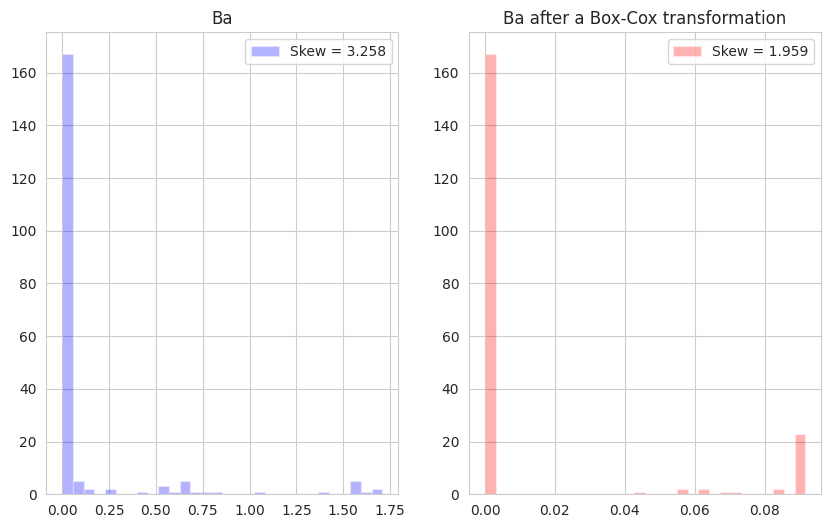

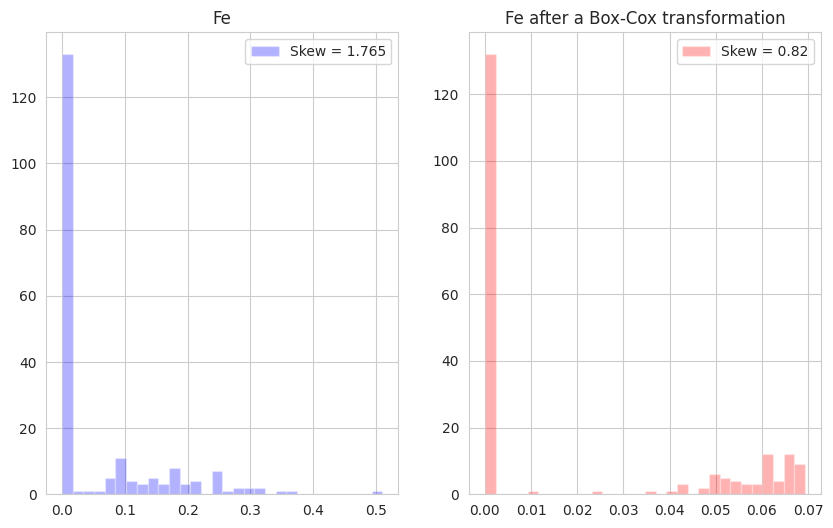

In [ ]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(10,6))
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

conclusion : less skewed after a Box-Cox transform

In [ ]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


Feature Selection
----

In [ ]:
x = df.drop('Type',axis=1)
y = df[['Type']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139, 1)
Shape of y_test (60, 1)


Standard Scaling
----

as per statistical analysis range between element is very large

In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# HYPERPARAMETER TUNING


choosing the value for K?
-----

- cross validation
  - grid search CV

The impact of selecting a smaller or larger K value on the model

- Larger K value: The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.

- Smaller k value: The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.


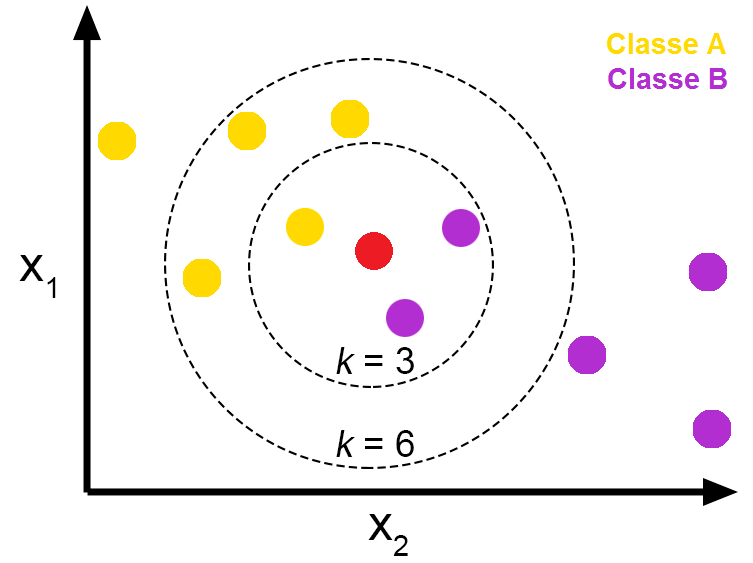

Grid search for choosing the best Value of K

In [ ]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(60,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


NOTE 🇮

- It is recommended to always select an odd value of K

- When the value of K is set to even, a situation may arise in which the elements from both groups are equal.

- In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.



 Visualizing the CV results

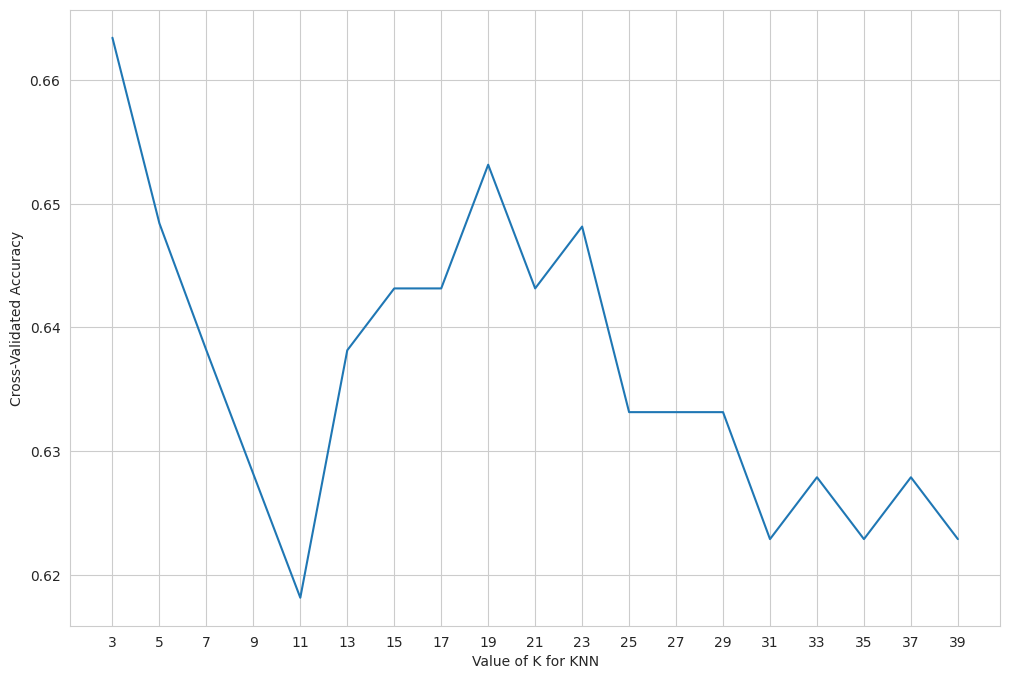

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

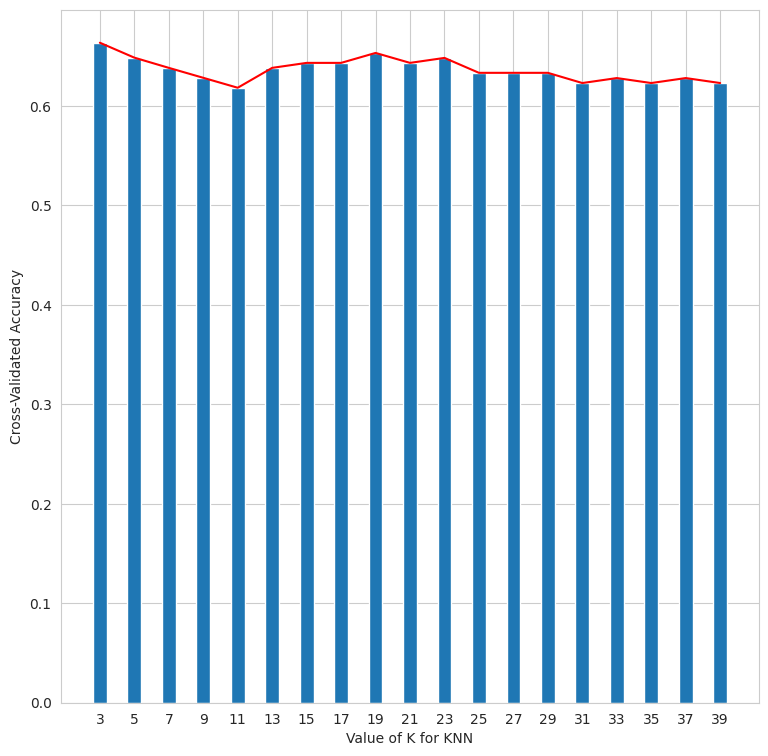

<Figure size 1200x800 with 0 Axes>

In [ ]:
# choose k between 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

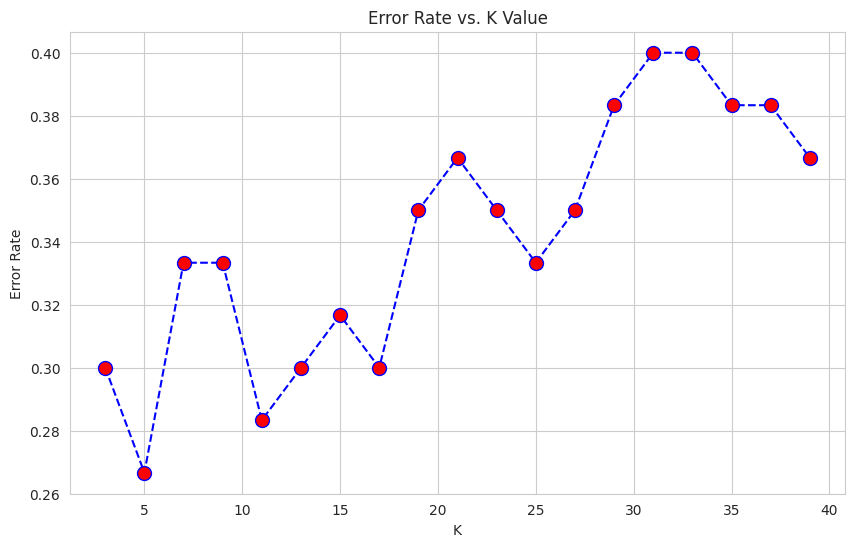

In [ ]:
error_rate = []

# Will take some time
k_range = [i for i in range(3,40, 2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(60,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after K>3 the error rate just tends to hover around 0 to 0.5

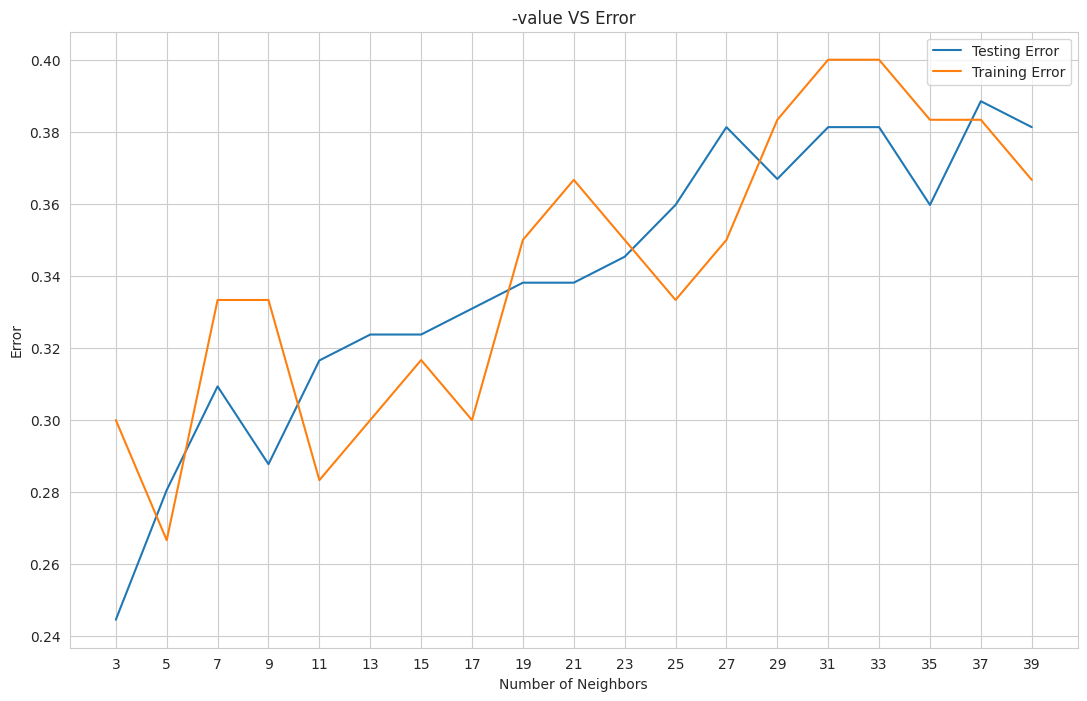

In [ ]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(139,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(60,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

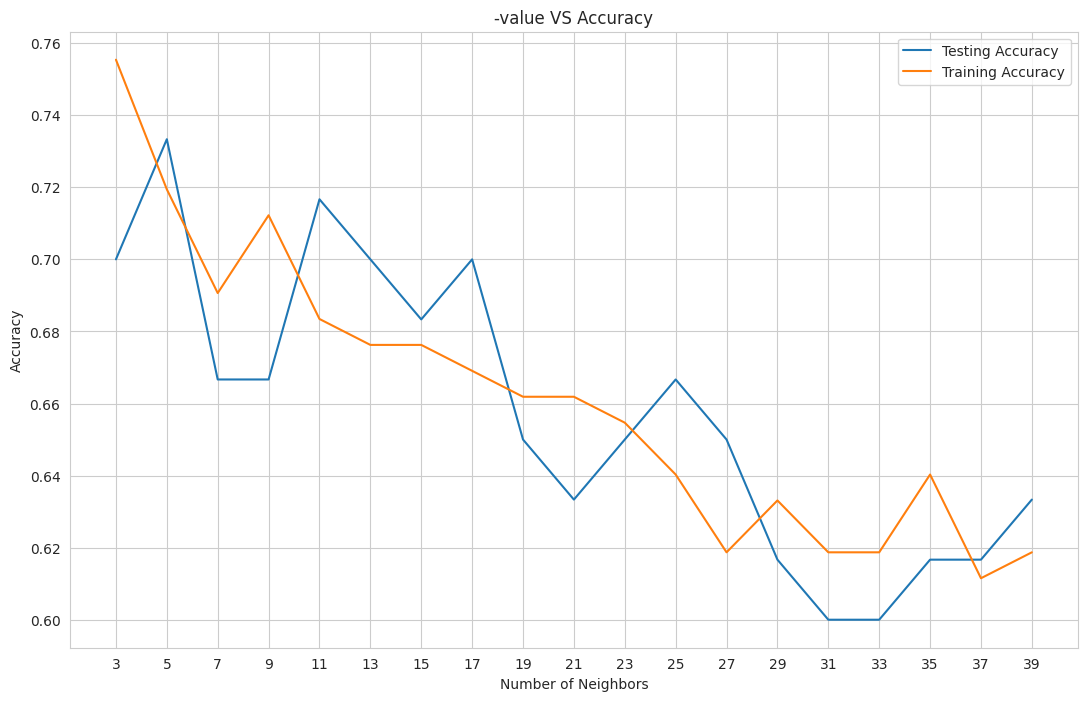

In [ ]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

# MODEL TRAINING

 K = 3

In [ ]:
# NOW WITH K=3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#fitting dataset
knn.fit(x_train,y_train)


KNeighborsClassifier(n_jobs=1, n_neighbors=3)

In [ ]:
#prediction on test dataset
pred = knn.predict(x_test)
pred

array([1, 6, 2, 2, 7, 7, 2, 1, 2, 5, 1, 5, 2, 1, 2, 1, 1, 1, 1, 2, 5, 1,
       2, 5, 1, 2, 7, 7, 2, 1, 1, 2, 2, 2, 1, 7, 1, 1, 1, 7, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 6, 2, 7, 1, 1, 1, 1, 1, 2, 1, 1])

# MODEL EVALUATION

CONFUSION MATRIX
---
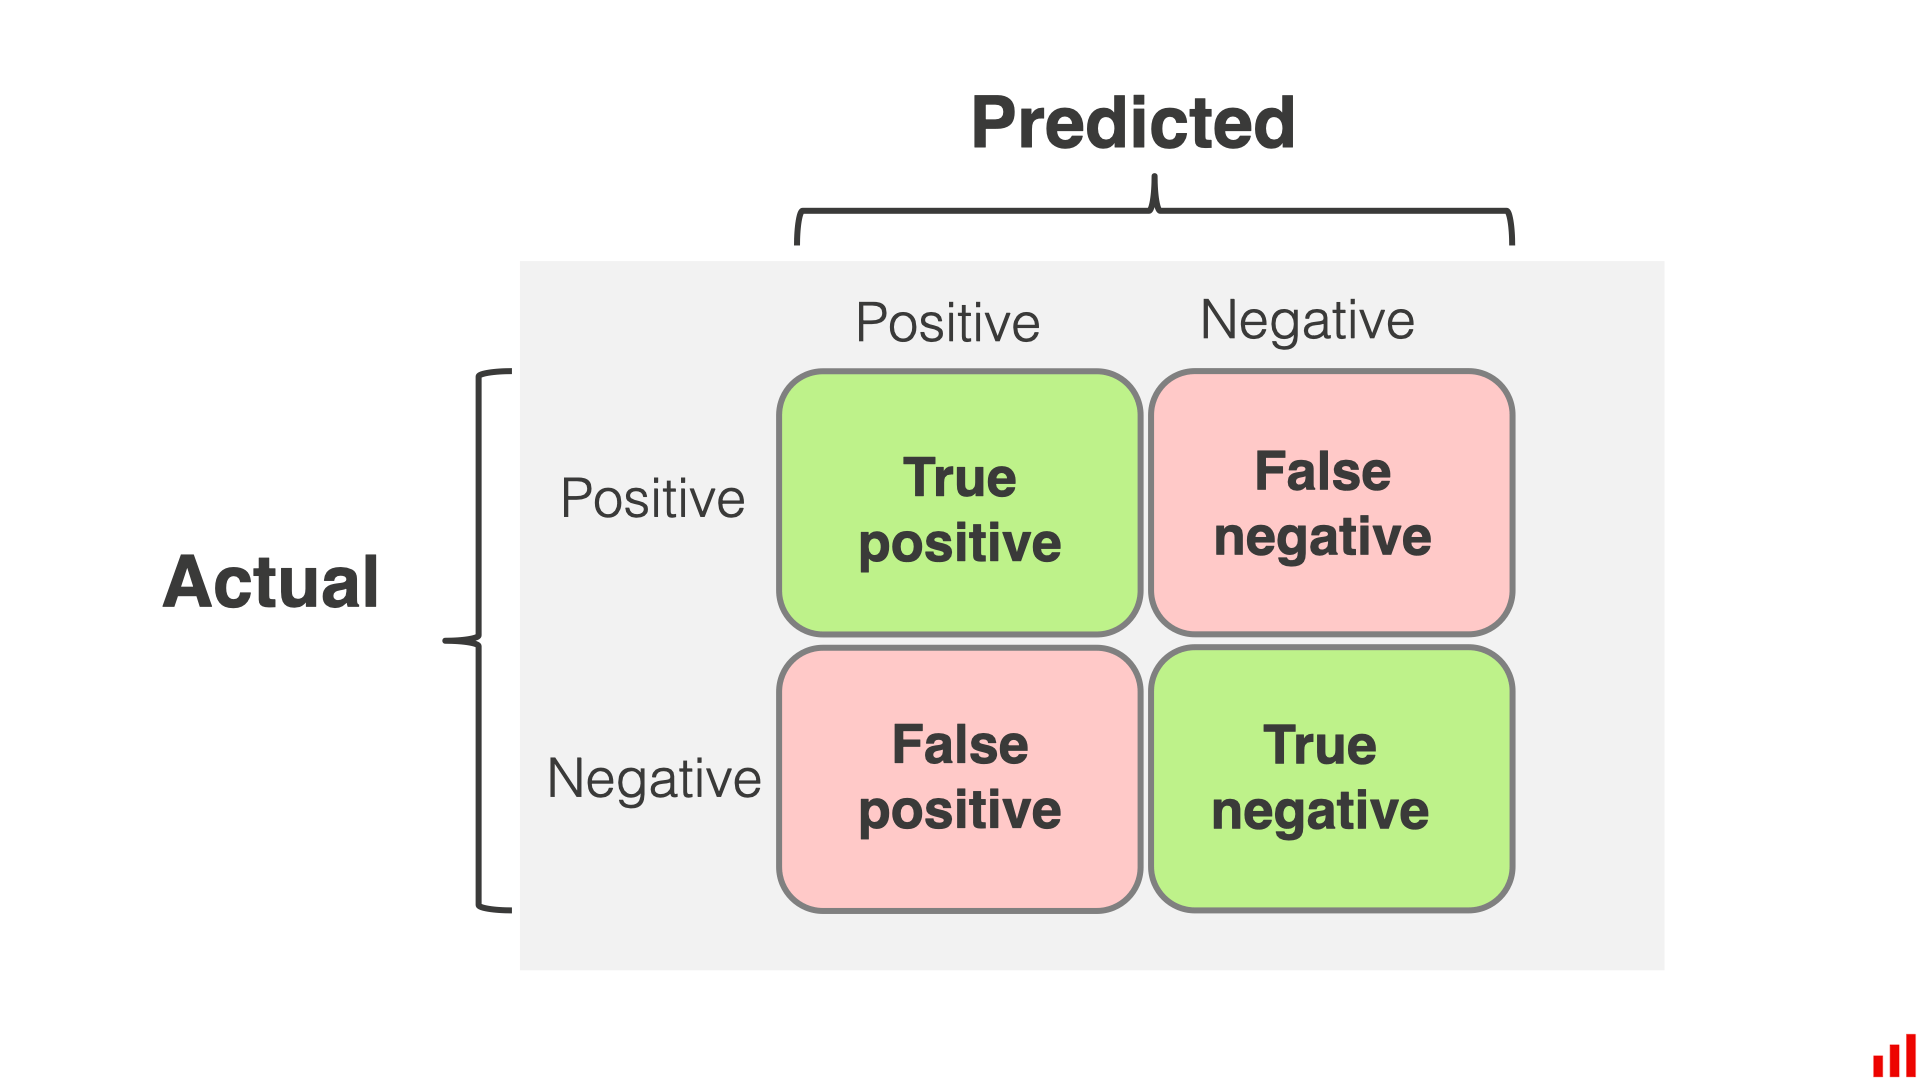

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[18,  4,  0,  0,  0,  0],
       [ 6, 12,  0,  1,  0,  0],
       [ 6,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]])

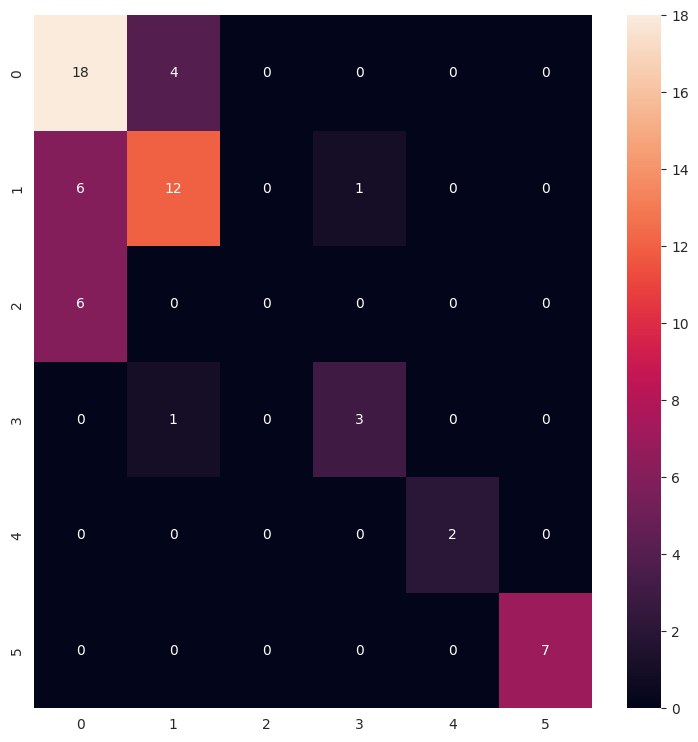

In [ ]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.show()

In [ ]:
#classification report

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[18  4  0  0  0  0]
 [ 6 12  0  1  0  0]
 [ 6  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.60      0.82      0.69        22
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         6
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.70        60
   macro avg       0.68      0.70      0.68        60
weighted avg       0.64      0.70      0.66        60



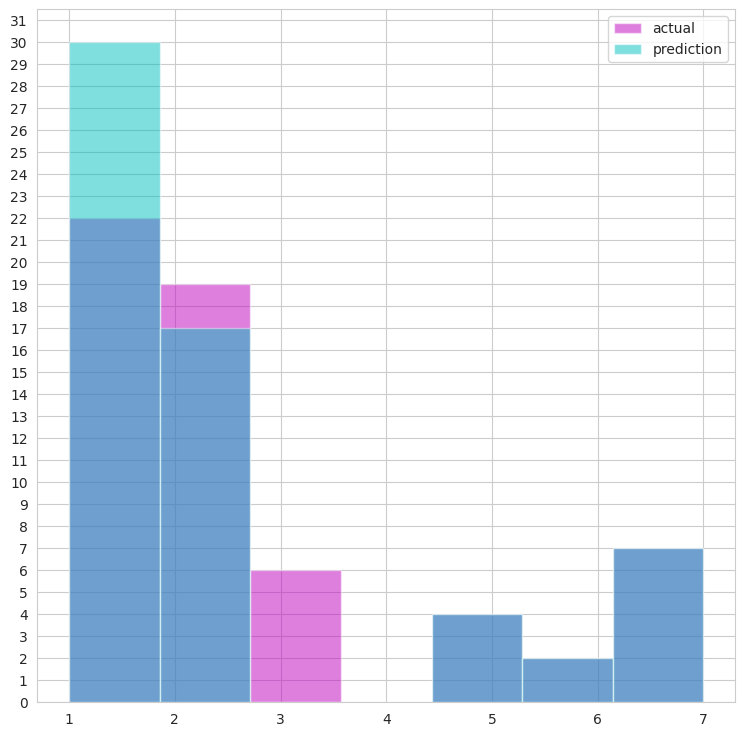

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,32))
ax.legend(loc = 'best')
plt.show()

# FINAL CONCLUSION

- frist data is visualize and found out scaling was required
- then standard scaling was applied
- and optimal no of k found using grid search cv
- and optimal k = 3
- knn model was preapred
- predictions were analized
- and finally model is evaluated by using CONFUSION MATRIX and CLASSIFICATION REPORT